In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import os
import random
import numpy as np
import matplotlib.pyplot as plt

# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [15]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print()
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


Image (#9): Which is digit '4'


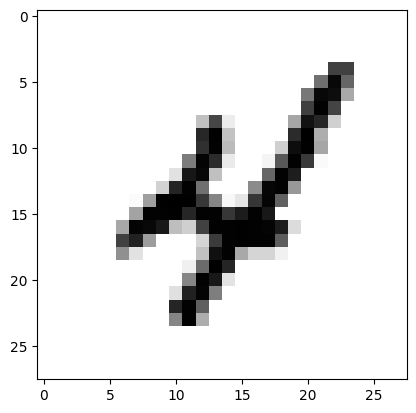

In [16]:
digit = 9 # Change to choose new digit
a = x_train[digit]
plt.imshow(a, cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")

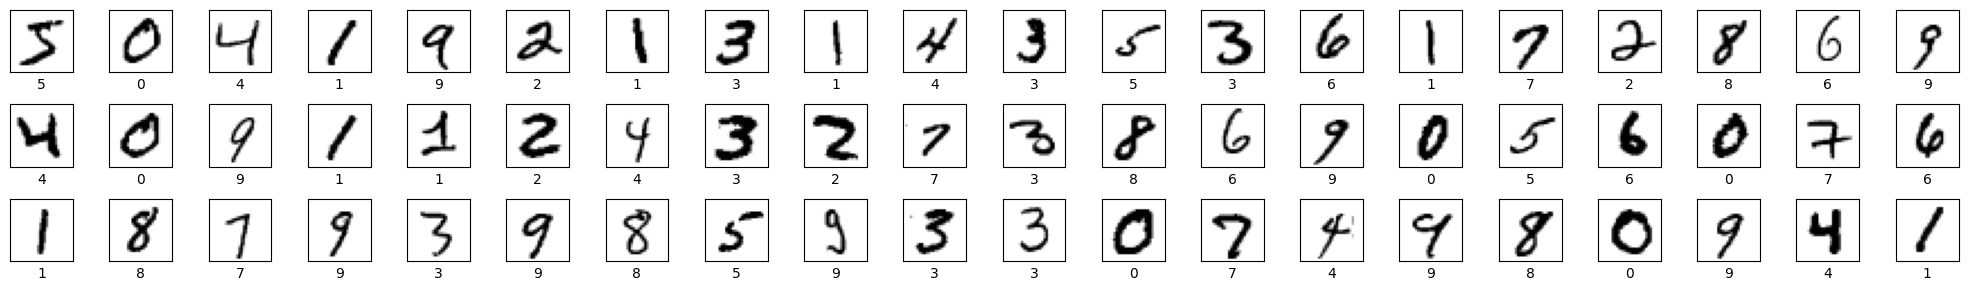

In [17]:
ROWS = 3
COLS = 20
i = 0

plt.figure(figsize=(20,3))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show() 

In [18]:
x_train = x_train.reshape(-1, 28*28).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28*28).astype("float32") / 255.0

In [19]:
model = keras.Sequential([
    keras.Input(shape=28*28),
    layers.Dense(units=256, activation='relu'),
    layers.Dense(units=128, activation='relu'),
    layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [26]:
optimizers = ['adam', 'sgd', 'rmsprop']
histories = {}

In [28]:
for optimizer in optimizers:
    model.compile(optimizer=optimizer, 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])

In [29]:
h = model.fit(x=x_train, y=y_train, epochs=5, batch_size=64, validation_split=0.3)
histories[optimizer] = h

Epoch 1/5
657/657 [==============================] - 4s 5ms/step - loss: 1.7799e-04 - accuracy: 1.0000 - val_loss: 0.1388 - val_accuracy: 0.9805
Epoch 2/5
657/657 [==============================] - 3s 5ms/step - loss: 3.0962e-05 - accuracy: 1.0000 - val_loss: 0.1389 - val_accuracy: 0.9806
Epoch 3/5
657/657 [==============================] - 3s 5ms/step - loss: 1.6666e-05 - accuracy: 1.0000 - val_loss: 0.1405 - val_accuracy: 0.9809
Epoch 4/5
657/657 [==============================] - 5s 7ms/step - loss: 1.3166e-05 - accuracy: 1.0000 - val_loss: 0.1412 - val_accuracy: 0.9805
Epoch 5/5
657/657 [==============================] - 5s 7ms/step - loss: 1.1581e-05 - accuracy: 1.0000 - val_loss: 0.1423 - val_accuracy: 0.9809


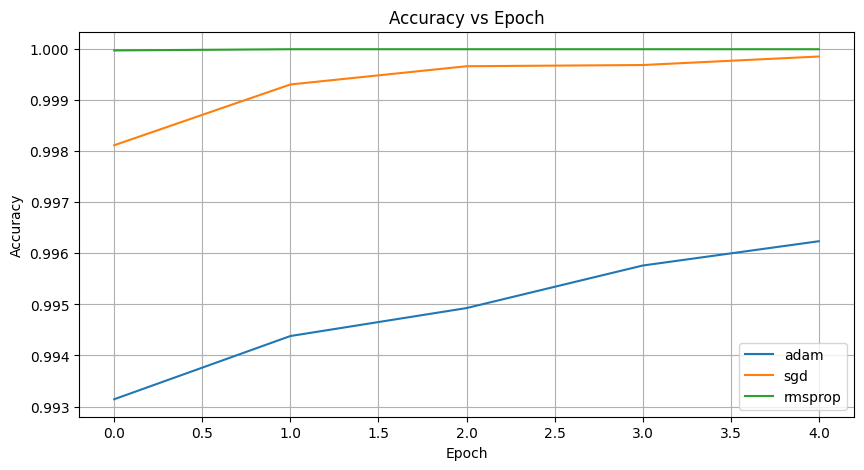

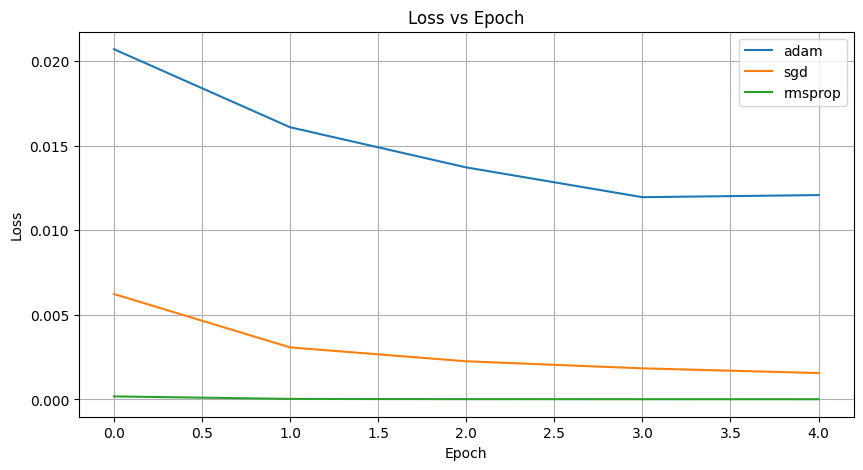

In [30]:
plt.figure(figsize=(10,5))
for optimizer in optimizers:
    plt.plot(histories[optimizer].history['accuracy'], label=optimizer)
plt.title('Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

# plot loss vs epoch for each optimizer
plt.figure(figsize=(10,5))
for optimizer in optimizers:
    plt.plot(histories[optimizer].history['loss'], label=optimizer)
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()